# Disease Wizard: Predicting Diseases based on Symptoms

Hello, we are a team of 2 - Ninad Sugandhi and Amrit Ranjan and I welcome you to Disease Wizard, a project that combines data science, web development and healthcare to predict diseases based on symptoms.

## Project Overview

The main objective of Disease Wizard is to provide accurate disease predictions by analyzing symptoms. By leveraging machine learning algorithms and a comprehensive dataset, Disease Wizard aims to assist medical professionals and individuals in making informed decisions about potential diseases.

## How it Works

1. **Data Collection**: Disease Wizard utilizes a diverse dataset containing symptoms and corresponding diseases. It contains 132 symptoms (features) and 41 different types of diseases (target variable). The dataset is collected from [Kaggle](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/data).

2. **Data Preprocessing**: The dataset is cleaned and prepared for analysis, ensuring high-quality data for accurate predictions.

3. **Feature Engineering**: Relevant features are extracted from the dataset to enhance the predictive power of the machine learning models.

4. **Model Training**: Machine learning models, such as logistic regression, decision trees, random forests, and XGBoost, are trained on the prepared dataset.

5. **Prediction and Analytics**: The trained models are used to predict diseases based on input symptoms. Additionally, various evaluation metrics, such as accuracy, precision, recall, and F1 score, are calculated to assess the performance of the models.

6. **Implementing in Web Application**: After the model is ready, we get into frontend and backend development. The frontend technologies we are going to use are: HTML, CSS, Javascript and backend technologies used are MongoDB or MySQL.

<br/>
<br/>

<p align="center"><img src = "./Dataset/lives.png" alt = "image.png"></p>
<br/>

Join us on this exciting journey of combining data science and healthcare to save lives and improve healthcare outcomes!

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ax
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score, precision_score, recall_score, balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [48]:
train = pd.read_csv('./Dataset/Training.csv')
test = pd.read_csv('./Dataset/Training.csv')
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [49]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [50]:
train = train.drop(["Unnamed: 133"], axis=1)
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [51]:
test = test.drop(["Unnamed: 133"], axis=1)
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
description = train.describe().T.style.background_gradient(
    cmap='viridis',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire DataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

,count,mean,std,min,25%,50%,75%,max
itching,4920.000000,0.137805,0.344730,0.000000,0.000000,0.000000,0.000000,1.000000
skin_rash,4920.000000,0.159756,0.366417,0.000000,0.000000,0.000000,0.000000,1.000000
nodal_skin_eruptions,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000
continuous_sneezing,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
shivering,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000
chills,4920.000000,0.162195,0.368667,0.000000,0.000000,0.000000,0.000000,1.000000
joint_pain,4920.000000,0.139024,0.346007,0.000000,0.000000,0.000000,0.000000,1.000000
stomach_pain,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
acidity,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
ulcers_on_tongue,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
description = test.describe().T.style.background_gradient(
    cmap='coolwarm',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire DataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

,count,mean,std,min,25%,50%,75%,max
itching,4920.000000,0.137805,0.344730,0.000000,0.000000,0.000000,0.000000,1.000000
skin_rash,4920.000000,0.159756,0.366417,0.000000,0.000000,0.000000,0.000000,1.000000
nodal_skin_eruptions,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000
continuous_sneezing,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
shivering,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000
chills,4920.000000,0.162195,0.368667,0.000000,0.000000,0.000000,0.000000,1.000000
joint_pain,4920.000000,0.139024,0.346007,0.000000,0.000000,0.000000,0.000000,1.000000
stomach_pain,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
acidity,4920.000000,0.045122,0.207593,0.000000,0.000000,0.000000,0.000000,1.000000
ulcers_on_tongue,4920.000000,0.021951,0.146539,0.000000,0.000000,0.000000,0.000000,1.000000


In [11]:
train.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4917,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4918,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
test.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4917,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4918,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [14]:
test.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [15]:
print(train.shape)
print(test.shape)
print(train.size)
print(test.size)

(4920, 133)
(4920, 134)
654360
659280


In [16]:
train.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [17]:
test.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

In [18]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4915     True
4916     True
4917     True
4918     True
4919     True
Length: 4920, dtype: bool

In [19]:
test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4915     True
4916     True
4917     True
4918     True
4919     True
Length: 4920, dtype: bool

In [20]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(train.empty)
print(test.empty)
print(train.index)
print(test.index)

4616
4616
False
False
RangeIndex(start=0, stop=4920, step=1)
RangeIndex(start=0, stop=4920, step=1)


In [25]:
for i in train.columns:
    print(i)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [22]:
test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

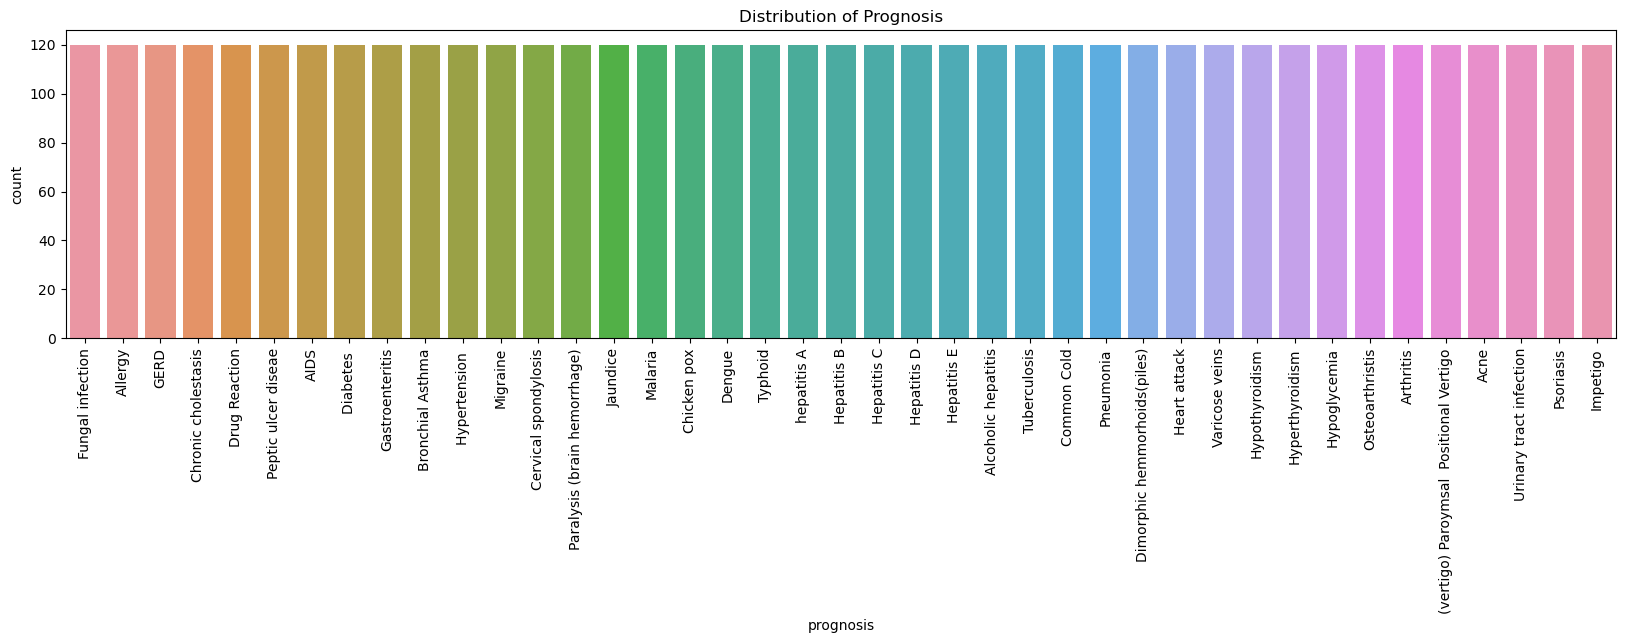

In [45]:
# Countplot
plt.figure(figsize=(20, 4))
sns.countplot(x='prognosis', data=train)
plt.title('Distribution of Prognosis')
plt.xticks(rotation=90)
plt.show()

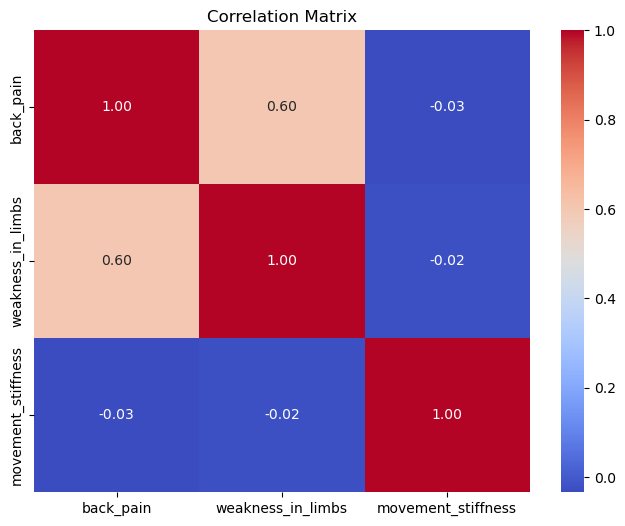

In [40]:
# Correlation Matrix
data = train[['back_pain', 'weakness_in_limbs', 'movement_stiffness', 'prognosis']]
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

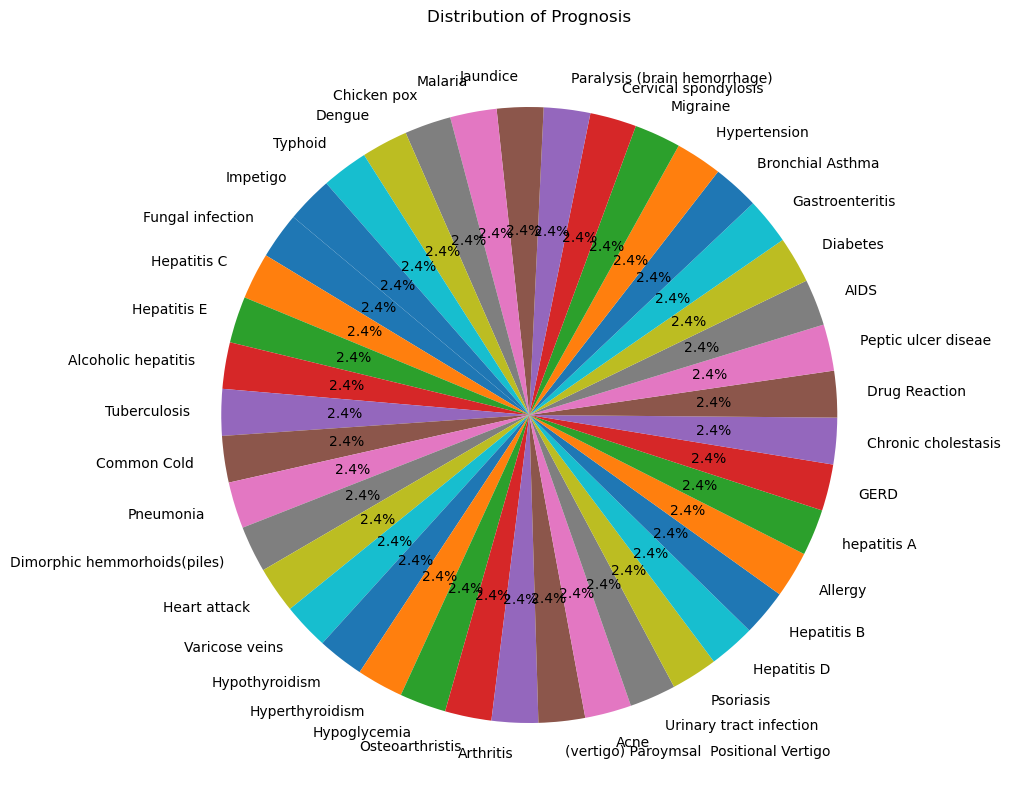

In [33]:
# Pie Chart
prognosis_counts = train['prognosis'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(prognosis_counts, labels=prognosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Prognosis')
plt.show()

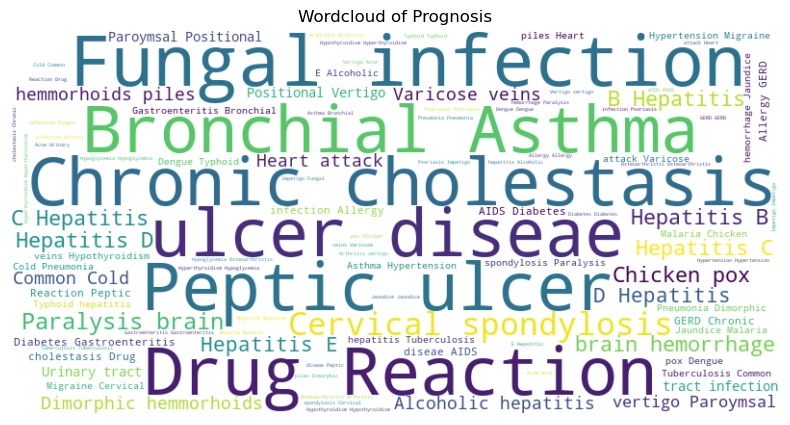

In [41]:
# Wordcloud
text = ' '.join(train['prognosis'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Prognosis')
plt.show()

In [52]:
label_encoder = LabelEncoder()
train['prognosis'] = label_encoder.fit_transform(train['prognosis'])
test['prognosis'] = label_encoder.transform(test['prognosis'])

X_train = train.drop(['prognosis'], axis=1)
y_train = train['prognosis']
X_test = test.drop(['prognosis'], axis=1)
y_test = test['prognosis']

In [56]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision'])

# Loop through each model, train, predict and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision}, ignore_index=True)
    print("The Classification report for ", model_name, "is: \n", class_report)
# Sort results by F1 Score in descending order
sorted_results = results.sort_values(by='F1 Score', ascending=False)

# Apply styling to the results table
styled_results = sorted_results.style.background_gradient(cmap=sns.color_palette("cool", as_cmap=True))

styled_results

The Classification report for  Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       120
          12       1.00      1.00      1.00       120
          13       1.00      1.00      1.00       120
          14       1.00      1.00      1.00       120
          15       1.00      1.00      1.00       120
          16       1.00 

,Model,Accuracy,F1 Score,Precision
0,Logistic Regression,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,1.000000,1.000000
2,KNN,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000
4,XGBoost,1.000000,1.000000,1.000000
